In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchmetrics import Accuracy, Precision, Recall
from torchsummary import summary
import time
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Dataset summary

Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [19]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [20]:
train.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [23]:
train.drop(columns=["Unnamed: 0", "id"],inplace=True)
test.drop(columns=["Unnamed: 0", "id"],inplace=True);

In [ ]:
## Missings

In [25]:
train.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [26]:
test.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [27]:
train[train['Arrival Delay in Minutes']==0].head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
7,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied


In [28]:
train[train['Arrival Delay in Minutes'].isna()].head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,Female,Loyal Customer,38,Business travel,Eco,109,5,3,3,3,...,5,5,2,4,1,1,5,31,NaN,satisfied
1124,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,3,4,...,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,Male,Loyal Customer,39,Business travel,Business,733,2,5,5,5,...,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,Female,disloyal Customer,26,Business travel,Business,1035,3,3,3,1,...,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,2,2,...,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied


Originally, it was assumed that missing values in the delay variable might indicate that no delay occurred. However, when no delay is present, the variable takes the value 0. For this reason, it was concluded that the missing data follow the MCAR mechanism, and observations containing missing values can be removed.

In [29]:
train = train.dropna()
test = test.dropna()

## Exploratory analysis

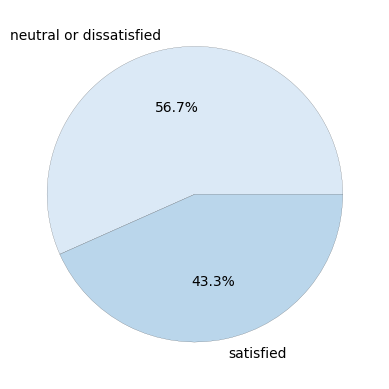

In [30]:
plt.pie(train.satisfaction.value_counts(), labels = ["neutral or dissatisfied", "satisfied"],colors = sns.color_palette("Blues"), wedgeprops={'edgecolor': 'black', 'linewidth': .1}, autopct = '%1.1f%%')
plt.show()

In [31]:
num = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
remaining_columns = [col for col in train.columns if col not in num and col != 'satisfaction']

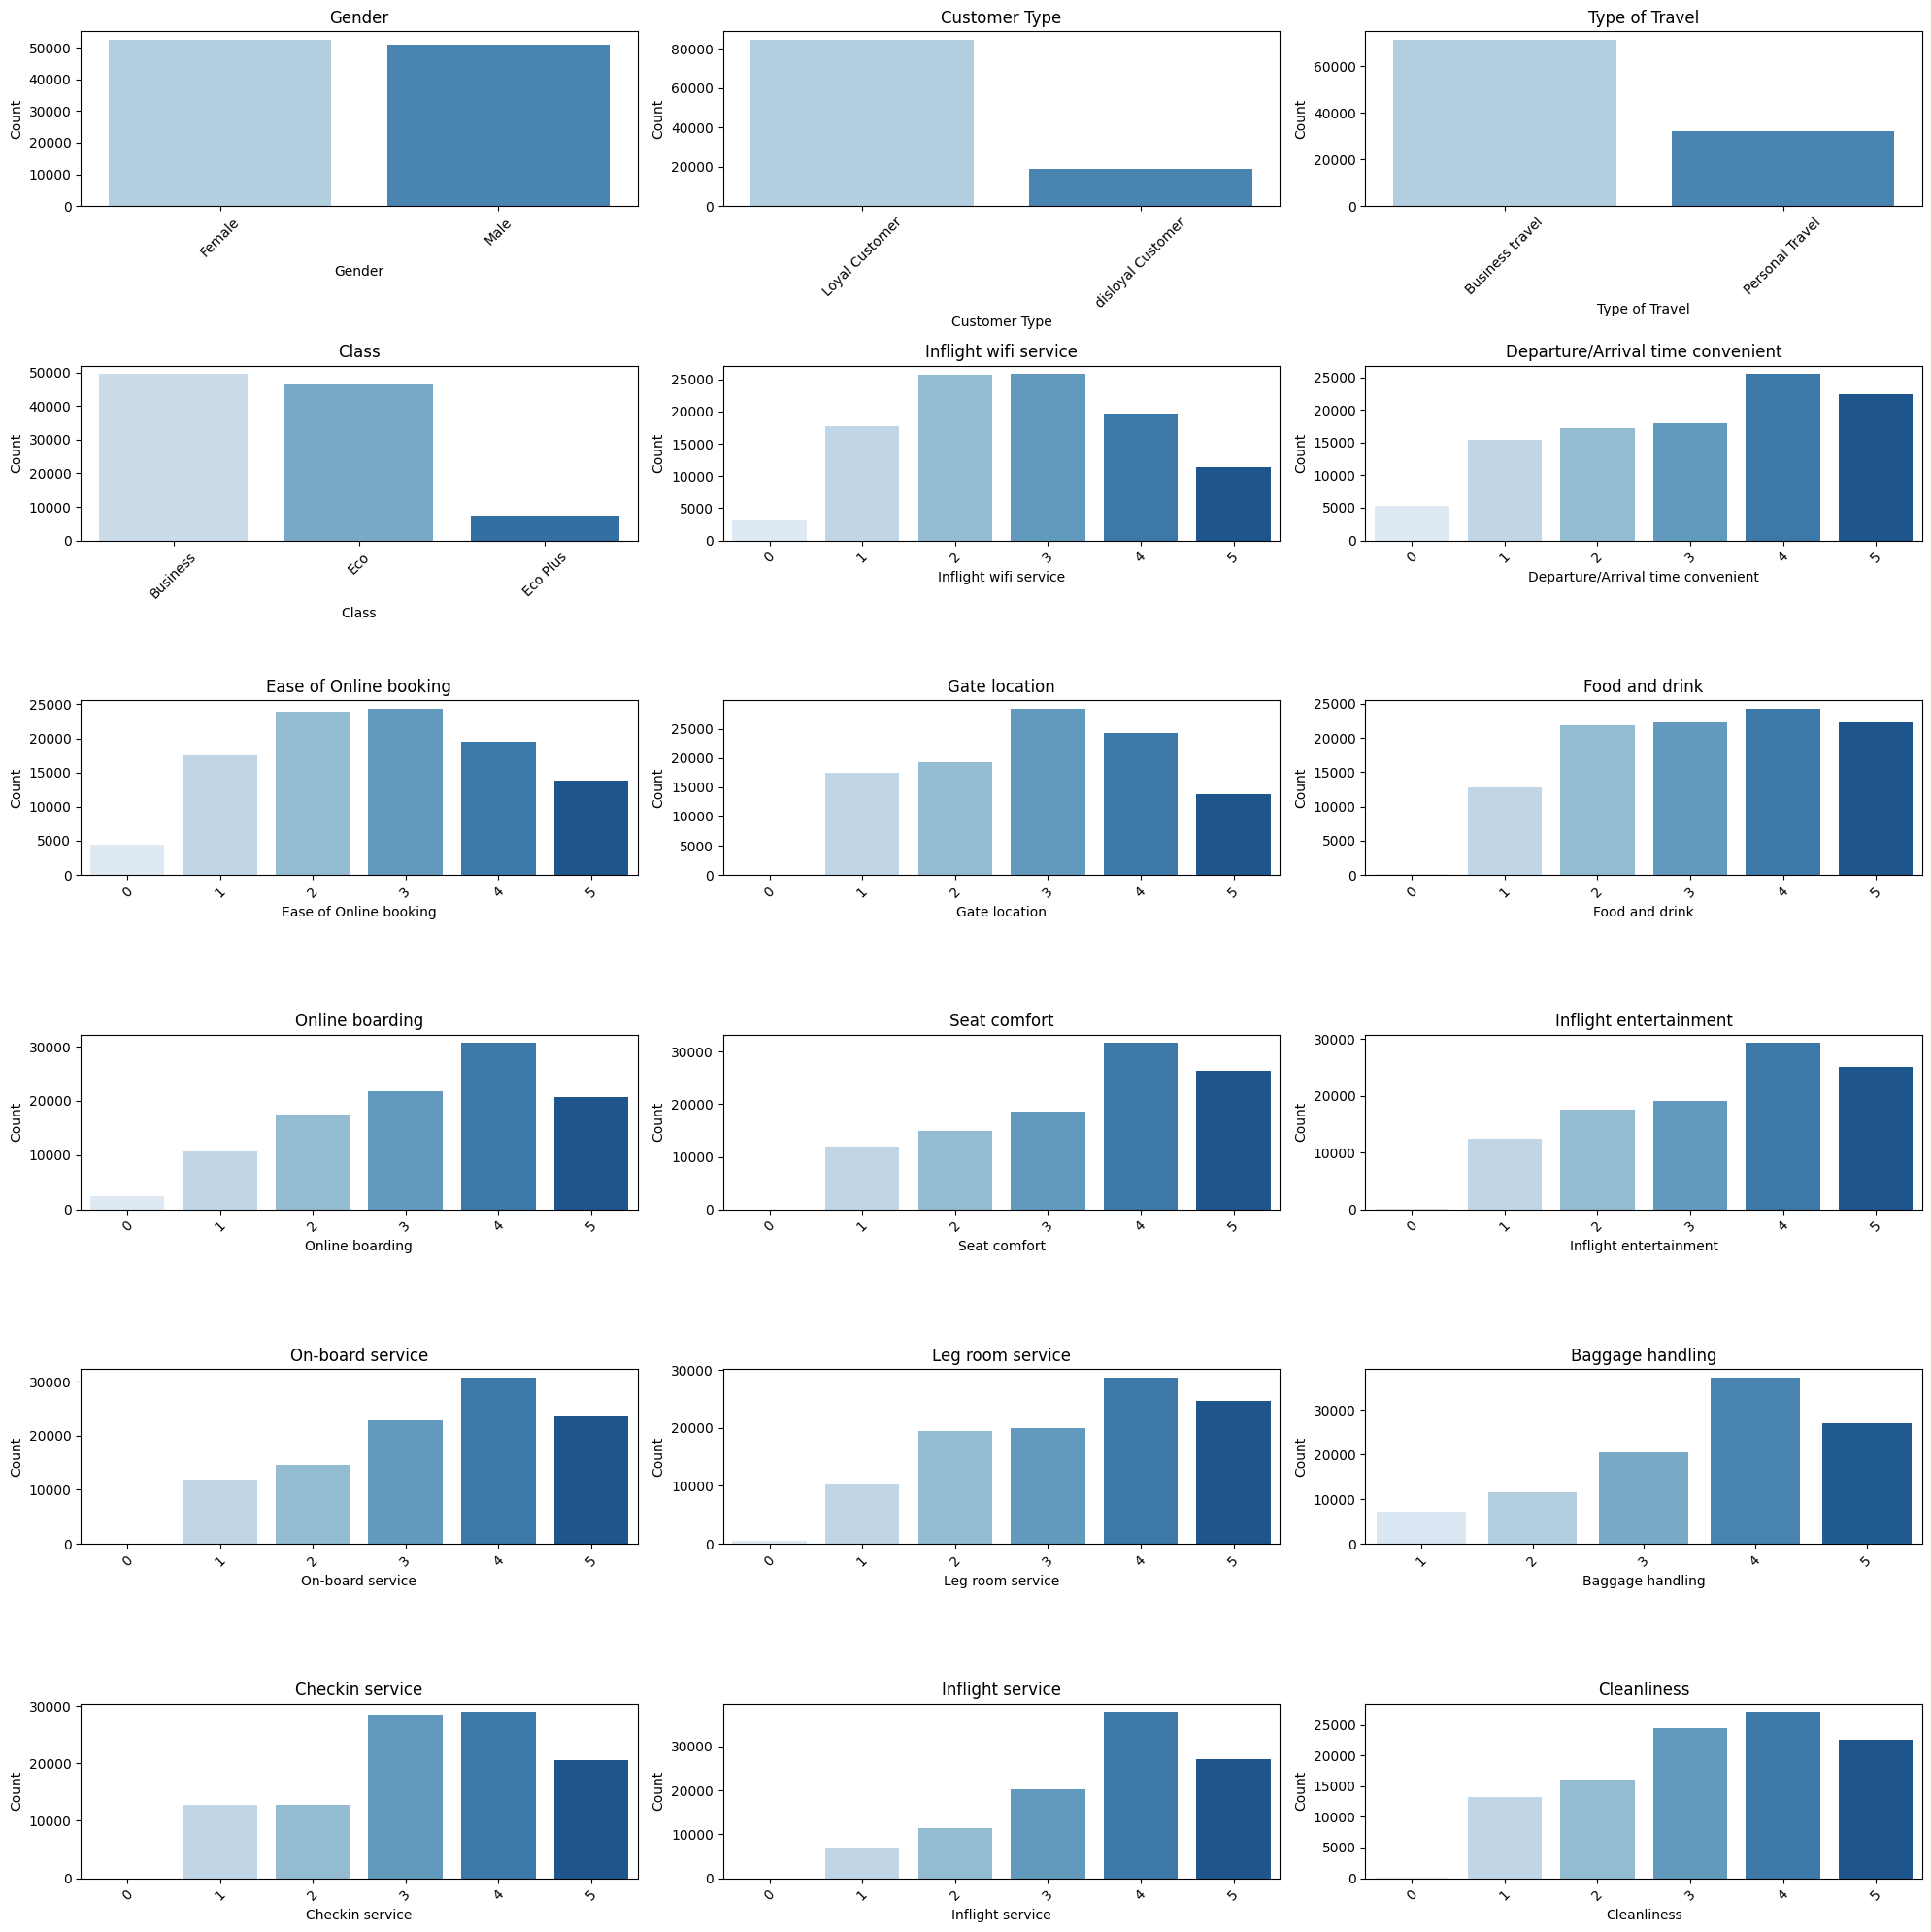

In [32]:
fig, axes = plt.subplots(6, 3, figsize=(20, 20)) 
for i, col in enumerate(remaining_columns):
    column_values = train[col].value_counts()
    labels = column_values.index
    sizes = column_values.values

    sns.barplot(
        x=labels, 
        y=sizes, 
        ax=axes[i // 3, i % 3], 
        palette="Blues"
    )

    axes[i // 3, i % 3].set_title(col)
    axes[i // 3, i % 3].set_ylabel("Count")
    axes[i // 3, i % 3].set_xlabel(col)
    axes[i // 3, i % 3].tick_params(axis='x', rotation=45)  



plt.tight_layout()
plt.show()

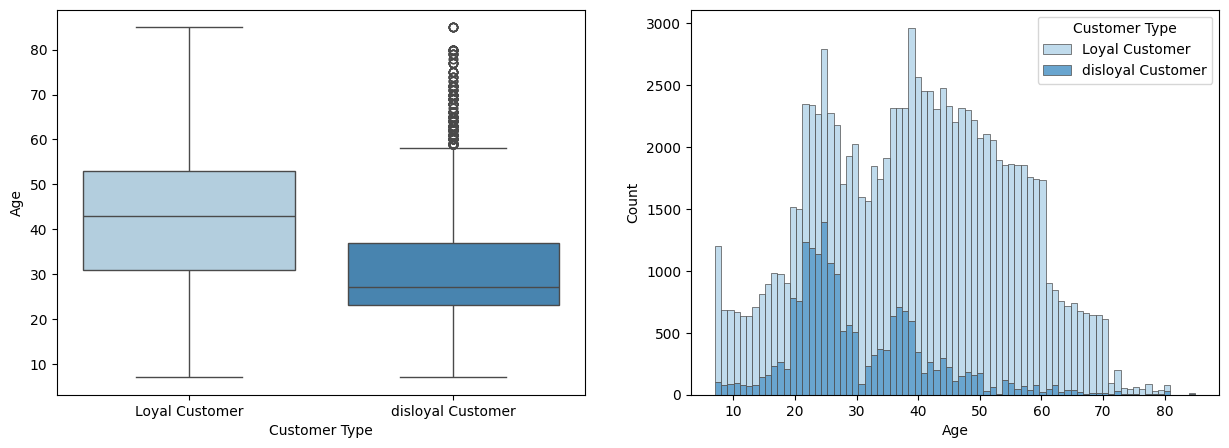

In [33]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Customer Type", y = "Age", palette = "Blues", data = train, ax = ax[0])
sns.histplot(train, x = "Age", hue = "Customer Type", multiple = "stack", palette = "Blues", edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

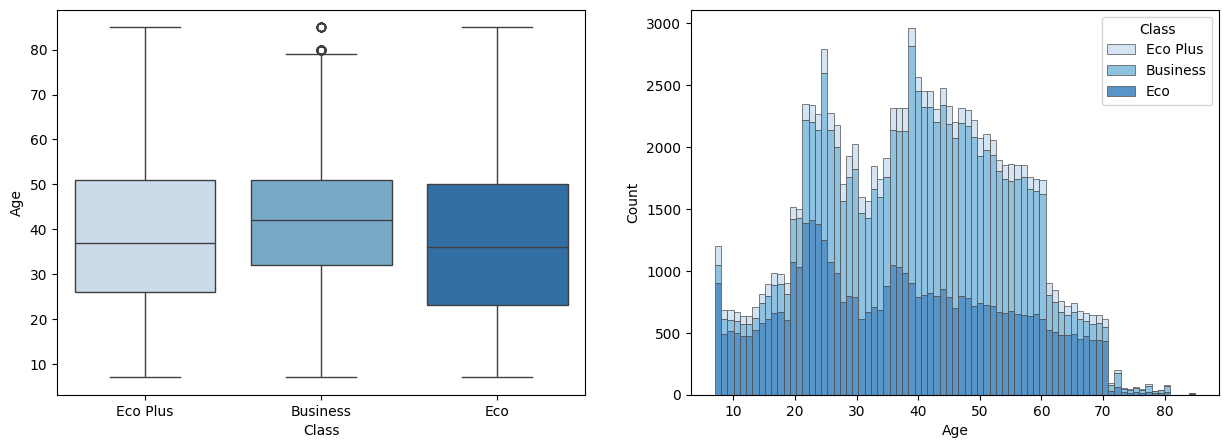

In [34]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Age", palette = "Blues", data = train, ax = ax[0])
sns.histplot(train, x = "Age", hue = "Class", multiple = "stack", palette = "Blues", edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

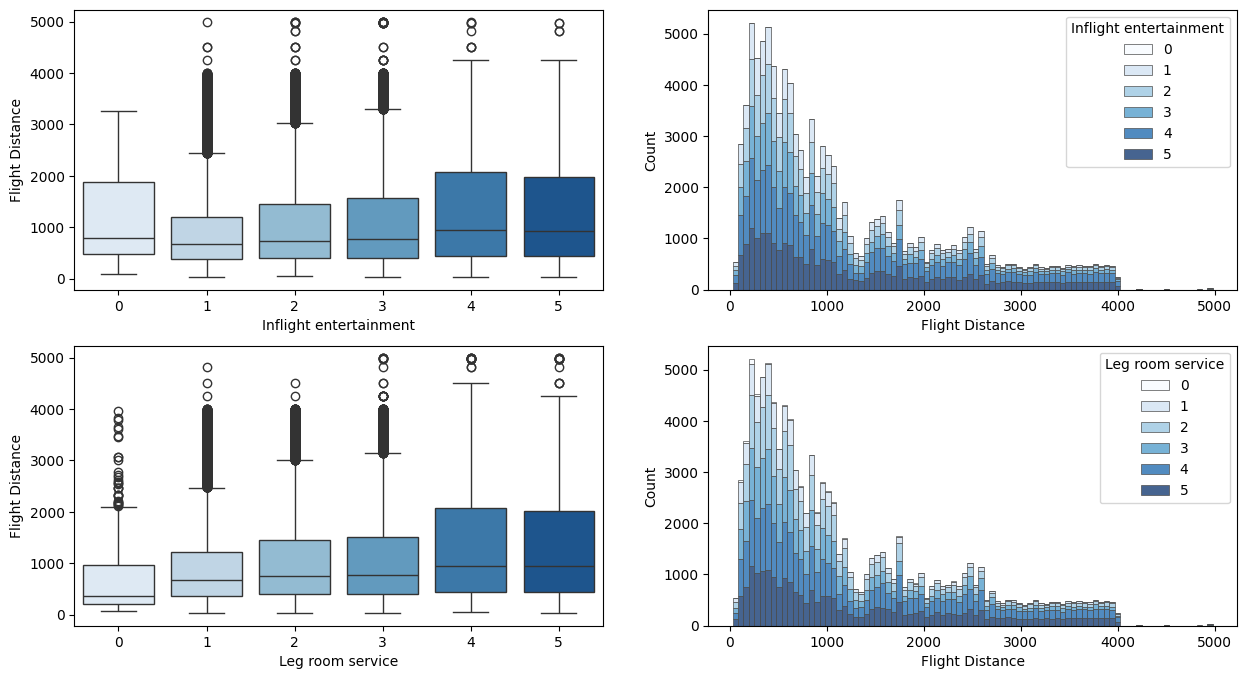

In [35]:
f, ax = plt.subplots(2, 2, figsize = (15,8))
sns.boxplot(x = "Inflight entertainment", y = "Flight Distance", palette = "Blues", data = train, ax = ax[0, 0])
sns.histplot(train, x = "Flight Distance", hue = "Inflight entertainment", multiple = "stack", palette = "Blues", edgecolor = ".3", linewidth = .5, ax = ax[0, 1])
sns.boxplot(x = "Leg room service", y = "Flight Distance", palette = "Blues", data = train, ax = ax[1, 0])
sns.histplot(train, x = "Flight Distance", hue = "Leg room service", multiple = "stack", palette = "Blues", edgecolor = ".3", linewidth = .5, ax = ax[1, 1])
pass

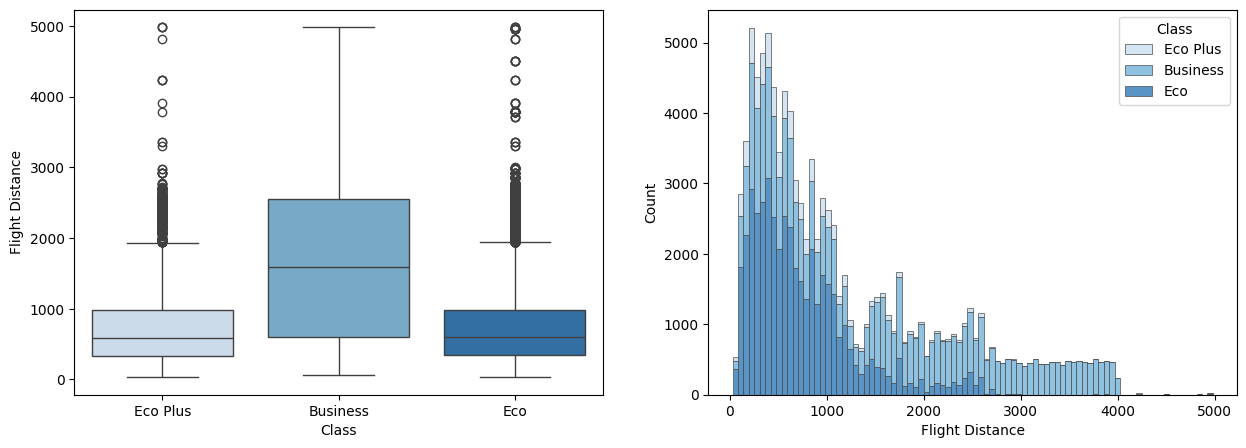

In [36]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Flight Distance", palette = "Blues", data = train, ax = ax[0])
sns.histplot(train, x = "Flight Distance", hue = "Class", multiple = "stack", palette = "Blues", edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

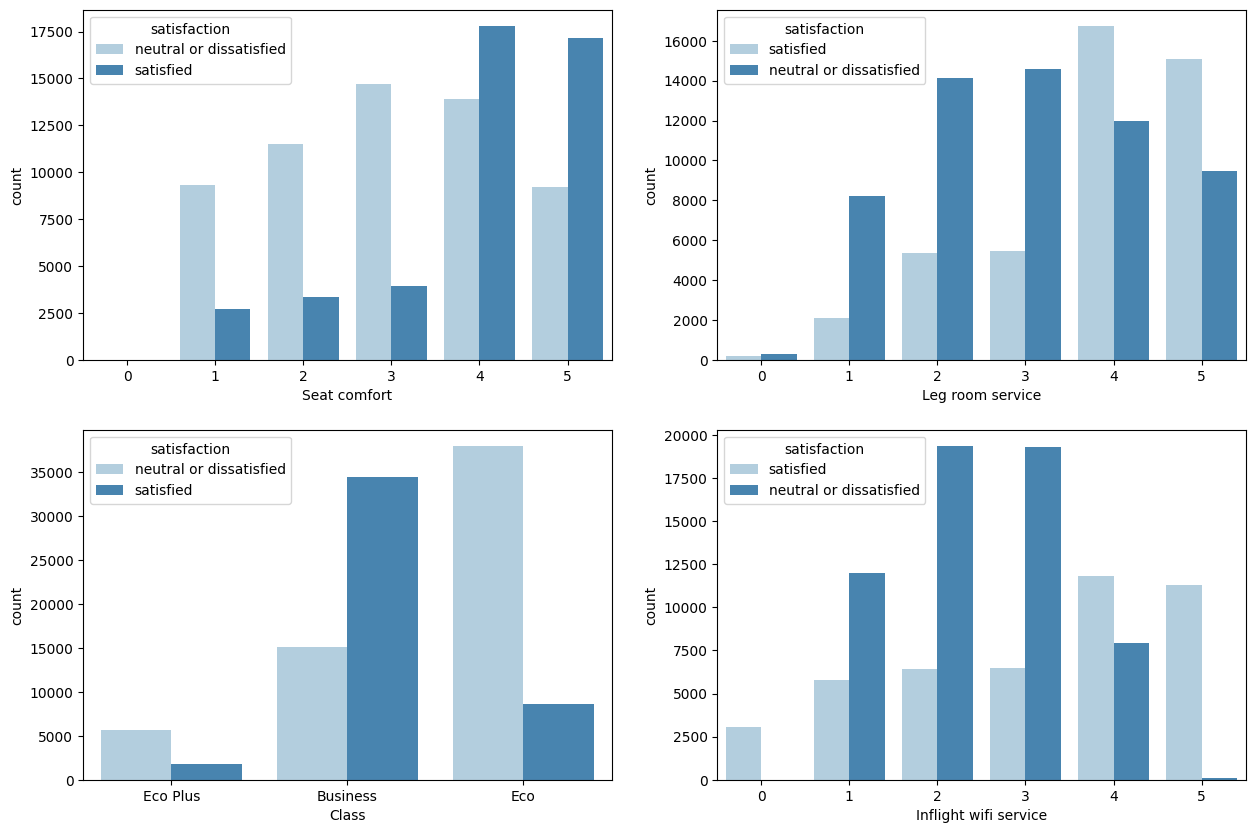

In [37]:
f, ax = plt.subplots(2, 2, figsize = (15,10))
sns.countplot(x = 'Seat comfort', hue = 'satisfaction', palette = "Blues", data = train,ax = ax[0,0])
sns.countplot(x = 'Leg room service', hue = 'satisfaction', palette = "Blues", data = train, ax = ax[0,1])
sns.countplot(x = 'Class', hue = 'satisfaction', palette = "Blues", data = train, ax = ax[1,0])
sns.countplot(x = 'Inflight wifi service', hue = 'satisfaction', palette = "Blues", data = train, ax = ax[1,1])
plt.show()

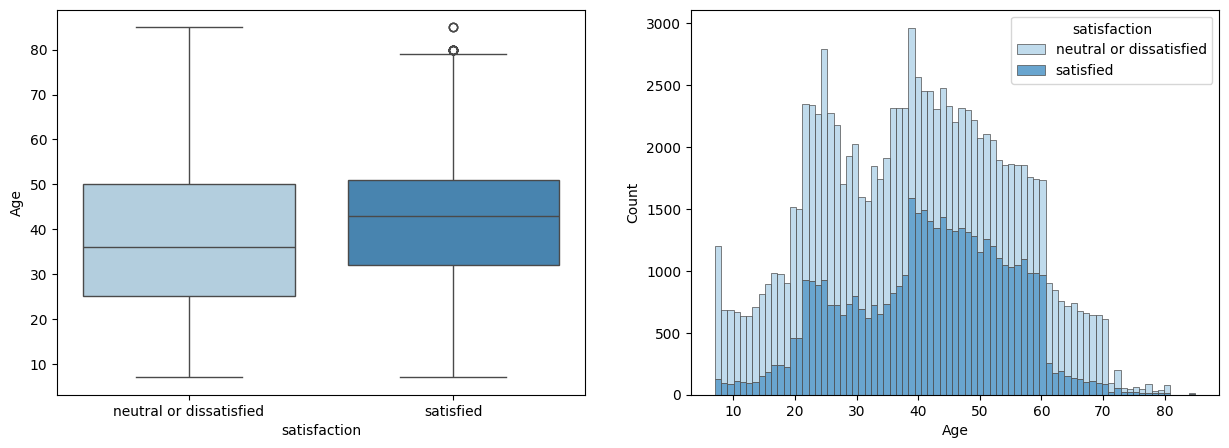

In [38]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "satisfaction", y = "Age", palette = "Blues", data = train, ax = ax[0])
sns.histplot(train, x = "Age", hue = "satisfaction", multiple = "stack", palette = "Blues", edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

<Axes: >

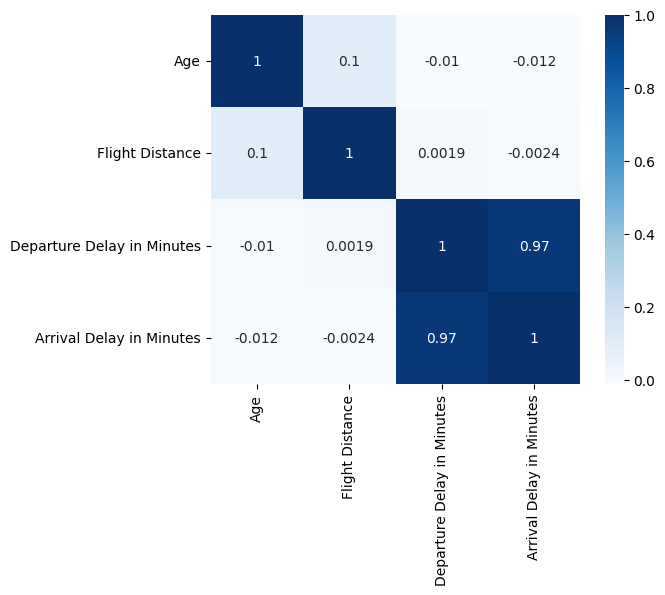

In [39]:
sns.heatmap(train[num].corr(), square = True,cmap = 'Blues', annot = True)

## Encoding and standarization

In [15]:
# Target

In [16]:
train['satisfaction']=train['satisfaction'].apply(lambda x: 1.0 if x == 'satisfied' else 0.0)
test['satisfaction']=test['satisfaction'].apply(lambda x: 1.0 if x == 'satisfied' else 0.0)

In [17]:
X_train = train.drop(columns=['satisfaction'])
y_train = train['satisfaction']

X_test = test.drop(columns=['satisfaction'])
y_test = test['satisfaction']

In [18]:
# Features

In [19]:
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns
num_columns = X_train.select_dtypes(exclude=['object', 'category']).columns

In [20]:
categorical_columns

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class'], dtype='object')

In [412]:
label_encoders = {col: LabelEncoder() for col in categorical_columns}

In [413]:
for col in categorical_columns:
    X_train[col] = label_encoders[col].fit_transform(X_train[col])
    X_test[col] = label_encoders[col].transform(X_test[col])


In [414]:
scaler = StandardScaler()
X_train[num_columns] = scaler.fit_transform(X_train[num_columns])
X_test[num_columns] = scaler.transform(X_test[num_columns])

In [415]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103594 entries, 0 to 103903
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103594 non-null  int32  
 1   Customer Type                      103594 non-null  int32  
 2   Age                                103594 non-null  float64
 3   Type of Travel                     103594 non-null  int32  
 4   Class                              103594 non-null  int32  
 5   Flight Distance                    103594 non-null  float64
 6   Inflight wifi service              103594 non-null  float64
 7   Departure/Arrival time convenient  103594 non-null  float64
 8   Ease of Online booking             103594 non-null  float64
 9   Gate location                      103594 non-null  float64
 10  Food and drink                     103594 non-null  float64
 11  Online boarding                    103594 no

In [416]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25893 entries, 0 to 25975
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25893 non-null  int32  
 1   Customer Type                      25893 non-null  int32  
 2   Age                                25893 non-null  float64
 3   Type of Travel                     25893 non-null  int32  
 4   Class                              25893 non-null  int32  
 5   Flight Distance                    25893 non-null  float64
 6   Inflight wifi service              25893 non-null  float64
 7   Departure/Arrival time convenient  25893 non-null  float64
 8   Ease of Online booking             25893 non-null  float64
 9   Gate location                      25893 non-null  float64
 10  Food and drink                     25893 non-null  float64
 11  Online boarding                    25893 non-null  float64


In [417]:
X_train = X_train.values
X_test = X_test.values

y_train = y_train.values
y_test = y_test.values

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

## Feed-forward NN

In [418]:
X_train_tensor.shape

torch.Size([103594, 22])

In [419]:
y_train_tensor.shape

torch.Size([103594])

In [446]:
class ClassicNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(ClassicNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(p=0.2)  
        
        self.fc2 = nn.Linear(hidden_size, hidden_size // 2)
        self.bn2 = nn.BatchNorm1d(hidden_size // 2)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(p=0.2)
        
        self.fc3 = nn.Linear(hidden_size // 2, hidden_size // 4)
        self.bn3 = nn.BatchNorm1d(hidden_size // 4)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(p=0.5)
        
        self.fc4 = nn.Linear(hidden_size // 4, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        
        x = self.fc3(x)
        x = self.bn3(x)
        x = self.relu3(x)
        x = self.dropout3(x)
        
        x = self.fc4(x)
        x = self.sigmoid(x)
        return x


In [447]:
batch_size = 128
train_dataset = TensorDataset(X_train_tensor, y_train_tensor.float())
test_dataset = TensorDataset(X_test_tensor, y_test_tensor.float())
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
input_size = X_train_tensor.shape[1]
hidden_size = 1024

#CPU for comparability with QNN
device = torch.device("cpu")
model = ClassicNN(input_size, hidden_size).to(device)
X_train_tensor = X_train_tensor.to(device)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [449]:
summary(model, input_size=(input_size,), device=str(device))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1024]          23,552
       BatchNorm1d-2                 [-1, 1024]           2,048
              ReLU-3                 [-1, 1024]               0
           Dropout-4                 [-1, 1024]               0
            Linear-5                  [-1, 512]         524,800
       BatchNorm1d-6                  [-1, 512]           1,024
              ReLU-7                  [-1, 512]               0
           Dropout-8                  [-1, 512]               0
            Linear-9                  [-1, 256]         131,328
      BatchNorm1d-10                  [-1, 256]             512
             ReLU-11                  [-1, 256]               0
          Dropout-12                  [-1, 256]               0
           Linear-13                    [-1, 1]             257
          Sigmoid-14                   

In [450]:
num_epochs = 10
best_accuracy = 0.0
classic_model = "classic_model.pth"

classic_train_losses = []
classic_test_accuracies = []
classic_train_accuracies = []
classic_epoch_times = []

for epoch in range(num_epochs):
    start_time = time.time()
    model.train()
    epoch_loss = 0.0
    correct_train = 0
    total_train = 0

    for x, y in train_loader:
        x = x.to(device)
        y = y.to(device)

        outputs = model(x).squeeze()
        loss = criterion(outputs, y)
        epoch_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        predicted_train = (outputs > 0.5).int()
        correct_train += (predicted_train == y.int()).sum().item()
        total_train += y.size(0)

    epoch_loss /= len(train_loader)
    train_accuracy = correct_train / total_train
    classic_train_losses.append(epoch_loss)
    classic_train_accuracies.append(train_accuracy)

    model.eval()
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for x, y in test_loader:
            x = x.to(device)
            y = y.to(device)

            outputs = model(x).squeeze()
            predicted_test = (outputs > 0.5).int()
            correct_test += (predicted_test == y.int()).sum().item()
            total_test += y.size(0)

    test_accuracy = correct_test / total_test
    classic_test_accuracies.append(test_accuracy)
    classic_epoch_times.append(time.time() - start_time)

    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        torch.save(model.state_dict(), classic_model)
        print(f"-> Best model saved at epoch {epoch + 1}")

    print(
        f"Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}, "
        f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}, "
        f"Time: {classic_epoch_times[-1]:.2f}s"
    )


-> Best model saved at epoch 1
Epoch [1/10], Loss: 0.1710, Train Accuracy: 0.9300, Test Accuracy: 0.9518, Time: 3.76s
-> Best model saved at epoch 2
Epoch [2/10], Loss: 0.1279, Train Accuracy: 0.9476, Test Accuracy: 0.9546, Time: 3.75s
-> Best model saved at epoch 3
Epoch [3/10], Loss: 0.1131, Train Accuracy: 0.9528, Test Accuracy: 0.9581, Time: 3.85s
-> Best model saved at epoch 4
Epoch [4/10], Loss: 0.1058, Train Accuracy: 0.9556, Test Accuracy: 0.9594, Time: 3.76s
-> Best model saved at epoch 5
Epoch [5/10], Loss: 0.1013, Train Accuracy: 0.9574, Test Accuracy: 0.9618, Time: 3.83s
Epoch [6/10], Loss: 0.0976, Train Accuracy: 0.9583, Test Accuracy: 0.9616, Time: 3.87s
Epoch [7/10], Loss: 0.0945, Train Accuracy: 0.9599, Test Accuracy: 0.9601, Time: 4.22s
-> Best model saved at epoch 8
Epoch [8/10], Loss: 0.0928, Train Accuracy: 0.9606, Test Accuracy: 0.9621, Time: 4.07s
Epoch [9/10], Loss: 0.0908, Train Accuracy: 0.9610, Test Accuracy: 0.9620, Time: 3.64s
-> Best model saved at epoch 10

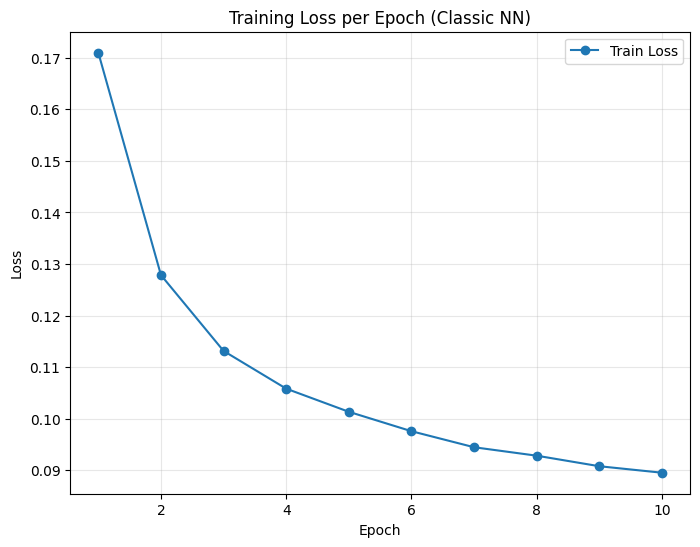

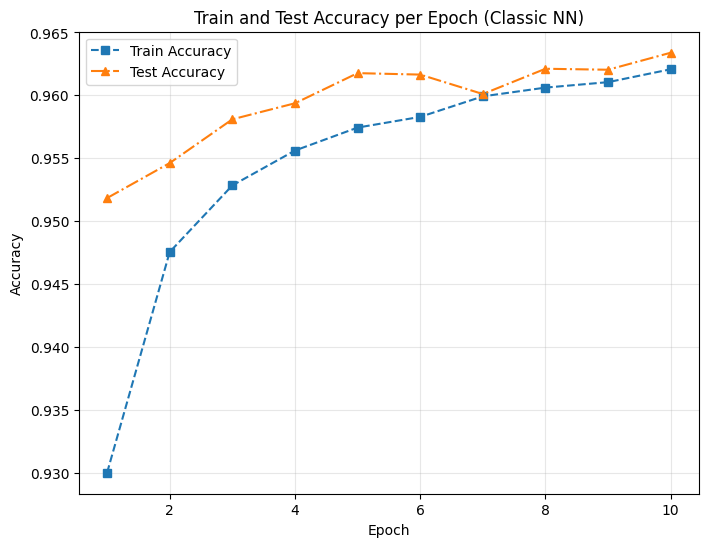

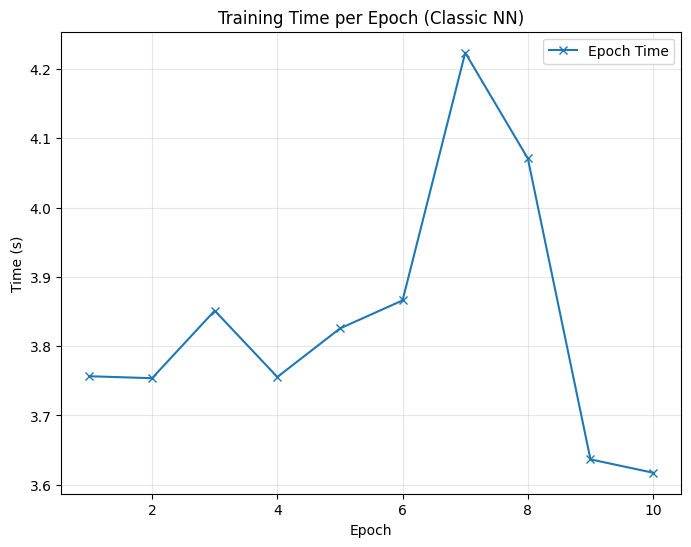

In [458]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs + 1), classic_train_losses, label="Train Loss", marker='o', linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss per Epoch (Classic NN)")
plt.grid(alpha=0.3)
plt.legend()
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs + 1), classic_train_accuracies, label="Train Accuracy", marker='s', linestyle='--')
plt.plot(range(1, num_epochs + 1), classic_test_accuracies, label="Test Accuracy", marker='^', linestyle='-.')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Train and Test Accuracy per Epoch (Classic NN)")
plt.grid(alpha=0.3)
plt.legend()
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs + 1), classic_epoch_times, label="Epoch Time", marker='x', linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Time (s)")
plt.title("Training Time per Epoch (Classic NN)")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

## Quantum NN

In [426]:
import pennylane as qml

In [ ]:
n_qubits = 4  
n_layers = 3
input_size = X_train_tensor.shape[1]
hidden_size = 1024

# Ansatz / quantum layer
dev = qml.device("default.qubit", wires=n_qubits)
weight_shapes = {"weights": (n_layers, n_qubits)}

@qml.qnode(dev)
def qnode(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits))
    qml.BasicEntanglerLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]

qlayer = qml.qnn.TorchLayer(qnode, weight_shapes)

In [440]:
class HybridNN(nn.Module):
    def __init__(self, input_size, hidden_size, quantum_layer, n_qubits):
        super(HybridNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(p=0.2)

        self.reduce_dim = nn.Linear(hidden_size, n_qubits)
        self.quantum_layer = quantum_layer

        self.fc2 = nn.Linear(n_qubits, hidden_size // 2)
        self.bn2 = nn.BatchNorm1d(hidden_size // 2)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(p=0.2)

        self.fc3 = nn.Linear(hidden_size // 2, hidden_size // 4)
        self.bn3 = nn.BatchNorm1d(hidden_size // 4)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(p=0.5)

        self.fc4 = nn.Linear(hidden_size // 4, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.dropout1(x)

        x = self.reduce_dim(x)
        x = self.quantum_layer(x)

        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.dropout2(x)

        x = self.fc3(x)
        x = self.bn3(x)
        x = self.relu3(x)
        x = self.dropout3(x)

        x = self.fc4(x)
        x = self.sigmoid(x)
        return x

In [441]:
input_size = X_train_tensor.shape[1]
hidden_size = 1024

device = torch.device("cpu")
model = HybridNN(input_size, hidden_size, qlayer, n_qubits).to(device)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
best_accuracy = 0.0
hybrid_model_path = "hybrid_model.pth"

In [442]:
summary(model, input_size=(input_size,), device=str(device))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1024]          23,552
       BatchNorm1d-2                 [-1, 1024]           2,048
              ReLU-3                 [-1, 1024]               0
           Dropout-4                 [-1, 1024]               0
            Linear-5                    [-1, 4]           4,100
        TorchLayer-6                    [-1, 4]               0
            Linear-7                  [-1, 512]           2,560
       BatchNorm1d-8                  [-1, 512]           1,024
              ReLU-9                  [-1, 512]               0
          Dropout-10                  [-1, 512]               0
           Linear-11                  [-1, 256]         131,328
      BatchNorm1d-12                  [-1, 256]             512
             ReLU-13                  [-1, 256]               0
          Dropout-14                  [

In [443]:
train_losses = []
test_accuracies = []
train_accuracies = []
epoch_times = []

for epoch in range(num_epochs):
    start_time = time.time()
    model.train()
    epoch_loss = 0.0
    correct_train = 0
    total_train = 0

    for x, y in train_loader:
        x = x.to(device)
        y = y.to(device)

        outputs = model(x).squeeze()
        loss = criterion(outputs, y)
        epoch_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        predicted_train = (outputs > 0.5).int()
        correct_train += (predicted_train == y.int()).sum().item()
        total_train += y.size(0)

    epoch_loss /= len(train_loader)
    train_accuracy = correct_train / total_train
    train_losses.append(epoch_loss)
    train_accuracies.append(train_accuracy)

    model.eval()
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for x, y in test_loader:
            x = x.to(device)
            y = y.to(device)

            outputs = model(x).squeeze()
            predicted_test = (outputs > 0.5).int()
            correct_test += (predicted_test == y.int()).sum().item()
            total_test += y.size(0)

    test_accuracy = correct_test / total_test
    test_accuracies.append(test_accuracy)
    epoch_times.append(time.time() - start_time)

    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        torch.save(model.state_dict(), hybrid_model_path)
        print(f"-> Best model saved at epoch {epoch + 1}")

    print(
        f"Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}, "
        f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}, "
        f"Time: {epoch_times[-1]:.2f}s"
    )

-> Best model saved at epoch 1
Epoch [1/10], Loss: 0.2059, Train Accuracy: 0.9157, Test Accuracy: 0.9394, Time: 12.34s
-> Best model saved at epoch 2
Epoch [2/10], Loss: 0.1628, Train Accuracy: 0.9337, Test Accuracy: 0.9461, Time: 12.48s
Epoch [3/10], Loss: 0.1504, Train Accuracy: 0.9378, Test Accuracy: 0.9430, Time: 12.33s
Epoch [4/10], Loss: 0.1380, Train Accuracy: 0.9427, Test Accuracy: 0.9387, Time: 12.31s
-> Best model saved at epoch 5
Epoch [5/10], Loss: 0.1316, Train Accuracy: 0.9459, Test Accuracy: 0.9527, Time: 12.28s
Epoch [6/10], Loss: 0.1259, Train Accuracy: 0.9473, Test Accuracy: 0.9503, Time: 12.87s
-> Best model saved at epoch 7
Epoch [7/10], Loss: 0.1201, Train Accuracy: 0.9498, Test Accuracy: 0.9552, Time: 12.87s
-> Best model saved at epoch 8
Epoch [8/10], Loss: 0.1158, Train Accuracy: 0.9515, Test Accuracy: 0.9559, Time: 12.37s
-> Best model saved at epoch 9
Epoch [9/10], Loss: 0.1122, Train Accuracy: 0.9526, Test Accuracy: 0.9584, Time: 12.42s
-> Best model saved at

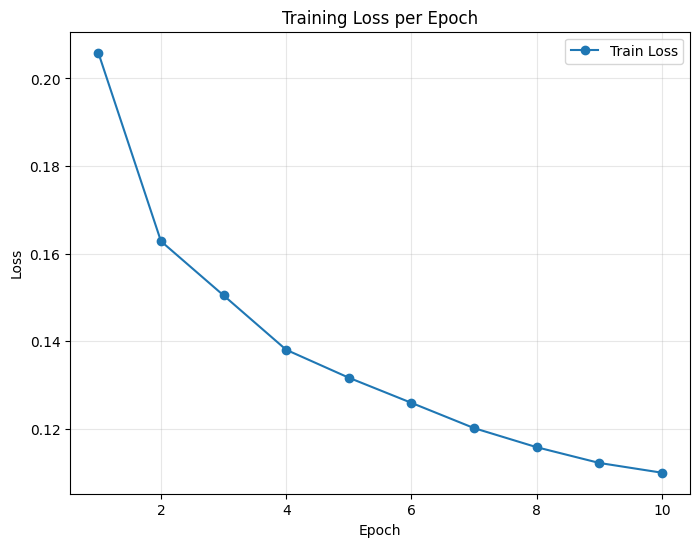

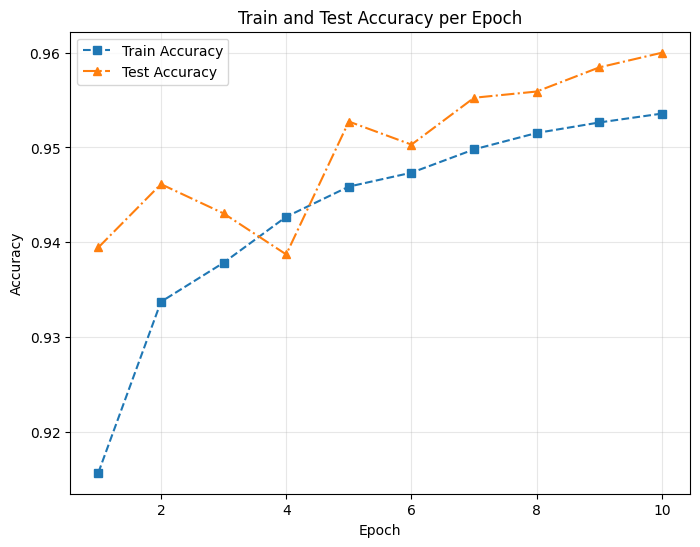

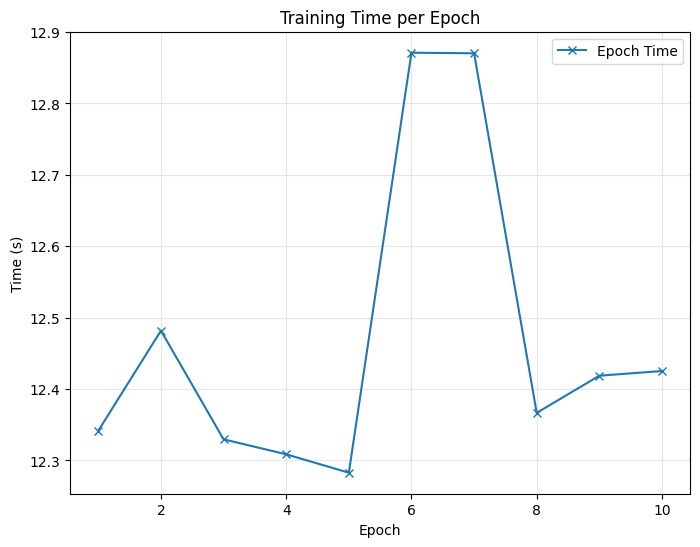

In [455]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label="Train Loss", marker='o', linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss per Epoch")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs + 1), train_accuracies, label="Train Accuracy",marker='s', linestyle='--')
plt.plot(range(1, num_epochs + 1), test_accuracies, label="Test Accuracy",marker='^', linestyle='-.')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Train and Test Accuracy per Epoch")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs + 1), epoch_times, label="Epoch Time",marker='x', linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Time (s)")
plt.title("Training Time per Epoch")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

## Comparison Hybrid Model vs Classic Model

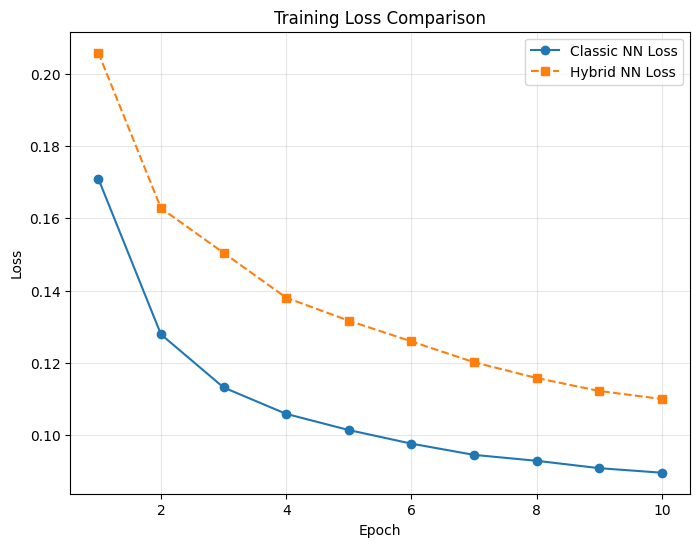

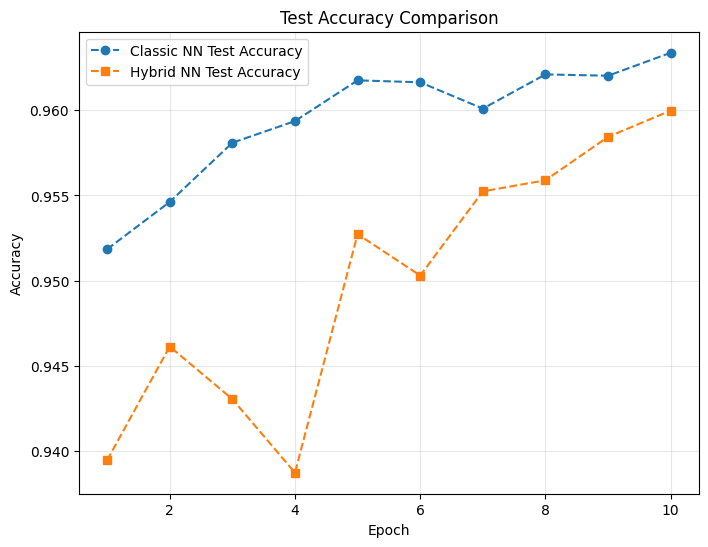

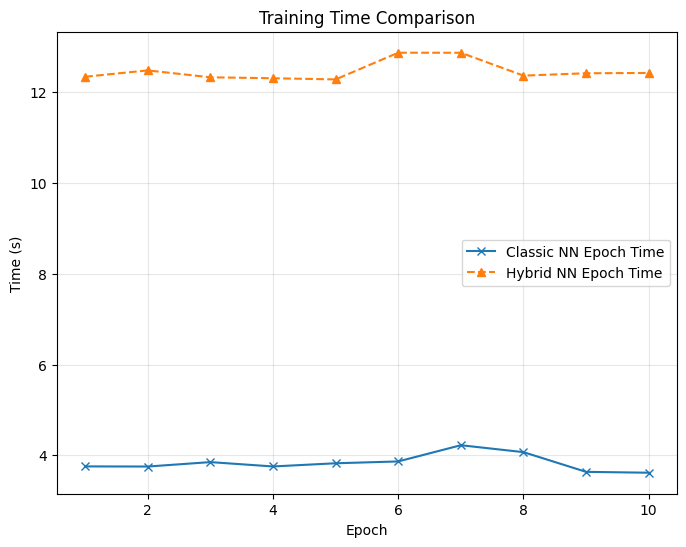

In [457]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs + 1), classic_train_losses, label="Classic NN Loss", marker='o', linestyle='-')
plt.plot(range(1, num_epochs + 1), train_losses, label="Hybrid NN Loss", marker='s', linestyle='--')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Comparison")
plt.grid(alpha=0.3)
plt.legend()
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs + 1), classic_test_accuracies, label="Classic NN Test Accuracy", marker='o', linestyle='--')
plt.plot(range(1, num_epochs + 1), test_accuracies, label="Hybrid NN Test Accuracy", marker='s', linestyle='--')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Test Accuracy Comparison")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs + 1), classic_epoch_times, label="Classic NN Epoch Time", marker='x', linestyle='-')
plt.plot(range(1, num_epochs + 1), epoch_times, label="Hybrid NN Epoch Time", marker='^', linestyle='--')
plt.xlabel("Epoch")
plt.ylabel("Time (s)")
plt.title("Training Time Comparison")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

## Sensitivity analysis (time & accuracy vs qubits)

In [460]:
def run_hybrid_experiment(qubit_range, num_epochs, input_size, hidden_size, train_loader, test_loader, device):
    results = {"n_qubits": [], "train_times": [], "test_accuracies": [], "train_accuracies": []}
    for n_qubits in qubit_range:
        dev = qml.device("default.qubit", wires=n_qubits)
        weight_shapes = {"weights": (3, n_qubits)}

        @qml.qnode(dev)
        def qnode(inputs, weights):
            qml.AngleEmbedding(inputs, wires=range(n_qubits))
            qml.BasicEntanglerLayers(weights, wires=range(n_qubits))
            return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]

        qlayer = qml.qnn.TorchLayer(qnode, weight_shapes)

        class HybridNN(nn.Module):
            def __init__(self, input_size, hidden_size, quantum_layer, n_qubits):
                super(HybridNN, self).__init__()
                self.fc1 = nn.Linear(input_size, hidden_size)
                self.bn1 = nn.BatchNorm1d(hidden_size)
                self.relu1 = nn.ReLU()
                self.dropout1 = nn.Dropout(p=0.2)
                self.reduce_dim = nn.Linear(hidden_size, n_qubits)
                self.quantum_layer = quantum_layer
                self.fc2 = nn.Linear(n_qubits, hidden_size // 2)
                self.bn2 = nn.BatchNorm1d(hidden_size // 2)
                self.relu2 = nn.ReLU()
                self.dropout2 = nn.Dropout(p=0.2)
                self.fc3 = nn.Linear(hidden_size // 2, hidden_size // 4)
                self.bn3 = nn.BatchNorm1d(hidden_size // 4)
                self.relu3 = nn.ReLU()
                self.dropout3 = nn.Dropout(p=0.5)
                self.fc4 = nn.Linear(hidden_size // 4, 1)
                self.sigmoid = nn.Sigmoid()

            def forward(self, x):
                x = self.fc1(x)
                x = self.bn1(x)
                x = self.relu1(x)
                x = self.dropout1(x)
                x = self.reduce_dim(x)
                x = self.quantum_layer(x)
                x = self.fc2(x)
                x = self.bn2(x)
                x = self.relu2(x)
                x = self.dropout2(x)
                x = self.fc3(x)
                x = self.bn3(x)
                x = self.relu3(x)
                x = self.dropout3(x)
                x = self.fc4(x)
                x = self.sigmoid(x)
                return x

        model = HybridNN(input_size, hidden_size, qlayer, n_qubits).to(device)
        criterion = nn.BCELoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

        train_losses = []
        test_accuracies = []
        train_accuracies = []
        epoch_times = []

        for epoch in range(num_epochs):
            start_time = time.time()
            model.train()
            correct_train = 0
            total_train = 0

            for x, y in train_loader:
                x = x.to(device)
                y = y.to(device)
                outputs = model(x).squeeze()
                loss = criterion(outputs, y)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                predicted_train = (outputs > 0.5).int()
                correct_train += (predicted_train == y.int()).sum().item()
                total_train += y.size(0)

            train_accuracy = correct_train / total_train
            train_accuracies.append(train_accuracy)

            model.eval()
            correct_test = 0
            total_test = 0
            with torch.no_grad():
                for x, y in test_loader:
                    x = x.to(device)
                    y = y.to(device)
                    outputs = model(x).squeeze()
                    predicted_test = (outputs > 0.5).int()
                    correct_test += (predicted_test == y.int()).sum().item()
                    total_test += y.size(0)

            test_accuracy = correct_test / total_test
            test_accuracies.append(test_accuracy)
            epoch_times.append(time.time() - start_time)

        results["n_qubits"].append(n_qubits)
        results["train_times"].append(sum(epoch_times) / num_epochs)
        results["test_accuracies"].append(test_accuracies[-1])
        results["train_accuracies"].append(train_accuracies[-1])

    return results

In [463]:
qubit_range = range(2, 7)
num_epochs = 5
input_size = 22
hidden_size = 1024

results = run_hybrid_experiment(qubit_range, num_epochs, input_size, hidden_size, train_loader, test_loader, device)

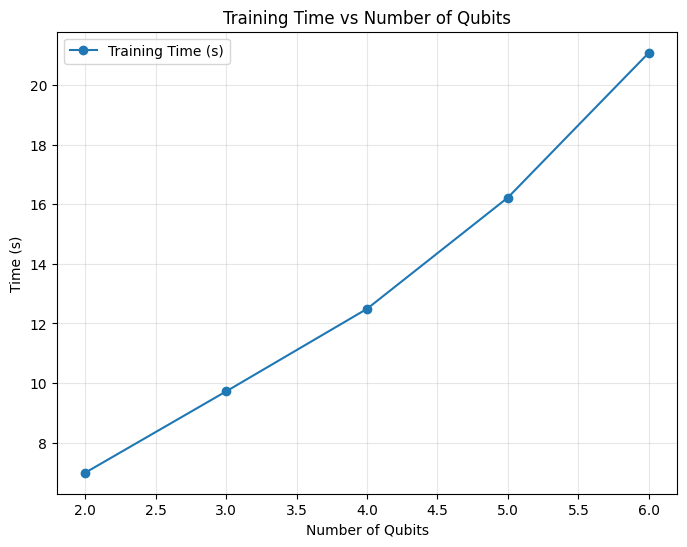

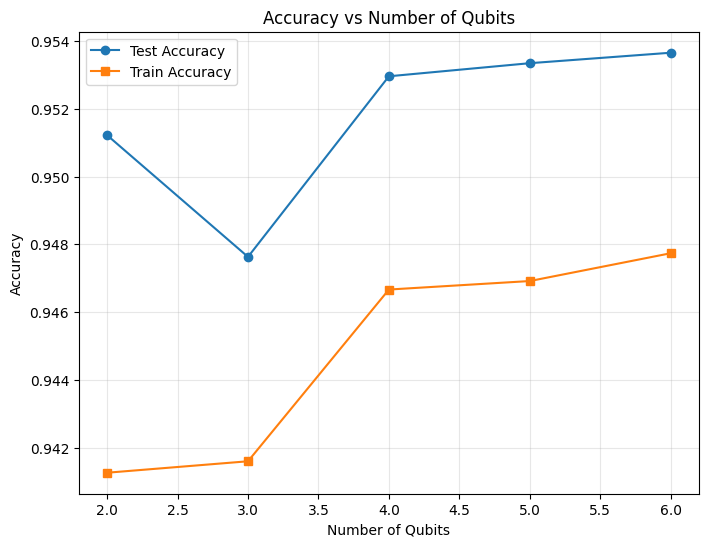

In [464]:
plt.figure(figsize=(8, 6))
plt.plot(results["n_qubits"], results["train_times"], marker='o', label="Training Time (s)")
plt.xlabel("Number of Qubits")
plt.ylabel("Time (s)")
plt.title("Training Time vs Number of Qubits")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(results["n_qubits"], results["test_accuracies"], marker='o', label="Test Accuracy")
plt.plot(results["n_qubits"], results["train_accuracies"], marker='s', label="Train Accuracy")
plt.xlabel("Number of Qubits")
plt.ylabel("Accuracy",)
plt.title("Accuracy vs Number of Qubits")
plt.grid(alpha=0.3)
plt.legend()
plt.show()